In [1]:
import numpy as np
import matplotlib.pyplot as plt


<table class="tfo-notebook-buttons" align="center">

  <td>
    <a target="_blank" href="https://colab.research.google.com/github/juancop/metodos_analitica_2/blob/main/03_ensables/01_bias_variance/Bias_Variance.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" /></a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/juancop/metodos_analitica_2/blob/dev/03_ensables/01_bias_variance/Bias_Variance.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" /></a>
  </td>
  
</table>

In [2]:
x = np.linspace(0, 10)

In [3]:
np.random.seed(42)

In [4]:
def generate_sample_data(x, factor):
  y_sample = x + 2 *np.sin(factor*x) + np.random.normal(0, 3, size = x.shape)
  y_true = x + 2 *np.sin(1.5*x)
  return x, y_sample, y_true

In [5]:
x, y_sample, y_true = generate_sample_data(x, 1.5)

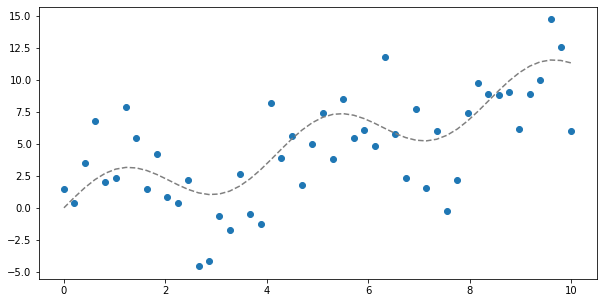

In [6]:
plt.figure(figsize = (10, 5))
plt.scatter(x, y_sample)
plt.plot(x, y_true, color = 'gray', linestyle = '--', label = 'True Function')
plt.show()

# Estimación de Modelos

Aquí se estimaría un modelo, lo que normalmente se haría en un flujo de modelamiento usual.

Entrenaremos en principio 3 modelos:
1. Una regresión lineal: $y_i = \beta_1 + \beta_2 x_{1i} + \varepsilon_i$
2. Una regresión polinómica de orden $d$: $y_i = \beta_1 + \beta_2 x_{1i} + + \beta_3 x_{1i}^2 + \dots + + \beta_{d+1} x_{1i}^d$

3. Un modelo de media: $y_i = \beta_1 + ɛ_i$

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


def get_polynomial_features(sample, degree = 2):
  constructor = PolynomialFeatures(degree=degree, include_bias=False)
  return constructor.fit_transform(sample.reshape(-1, 1))



In [8]:
x_pol_2 = get_polynomial_features(x, degree = 2)
x_pol_15 = get_polynomial_features(x, degree = 15)

In [9]:
def train_and_predict(x, y):
  model = LinearRegression()
  model.fit(x, y.reshape(-1, 1))
  y_pred = model.predict(x)
  return y_pred


In [10]:
fit_d2 = train_and_predict(x_pol_2, y_sample)
fit_d15 = train_and_predict(x_pol_15, y_sample)
fit_lr = train_and_predict(x.reshape(-1, 1), y_sample)


prediction_dict = {
    'Poly d2': [fit_d2, 'green'],
    'Poly d15': [fit_d15, 'orange'],
    'LR': [fit_lr, 'purple']
}

In [11]:
def plot_predictions(prediction_dict, x, y_sample, y_truem, label = True):
  if label:
    plt.plot(x, y_true, color = 'gray', linestyle = '--', label = 'True Function')

    plt.scatter(x, y_sample)
  for name, predictions in prediction_dict.items():
    prediction = predictions[0]
    color = predictions[1]
    if label:
      plt.plot(x, prediction, label = name, alpha = 0.5, color = color)
    else:
      plt.plot(x, prediction, alpha = 0.5, color = color)

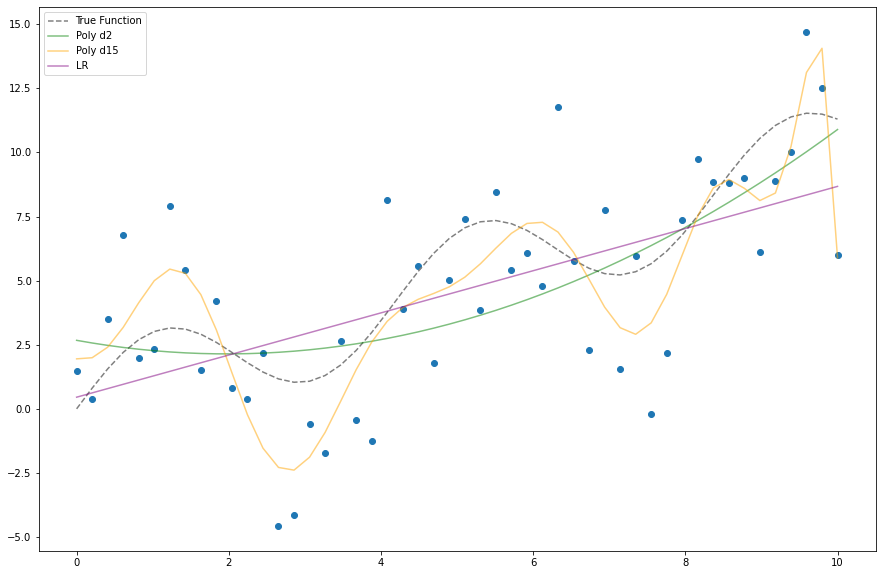

In [12]:
plt.figure(figsize = (15, 10))
plot_predictions(prediction_dict, x, y_sample, y_true)
plt.legend()

# Simulación Diferentes Muestras


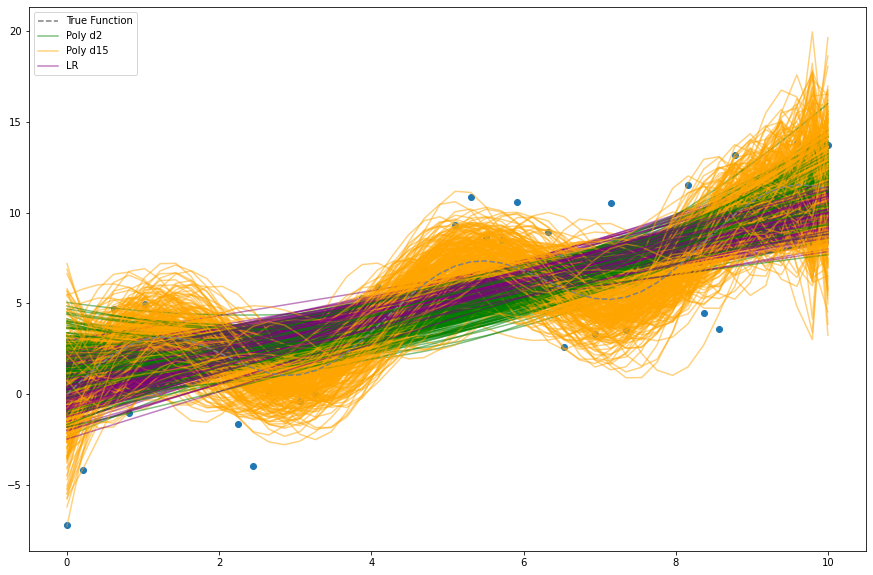

In [13]:
np.random.seed(10)
n_sims = 300

plt.figure(figsize = (15, 10))
for idx in range(n_sims):

  x, y_sample, y_true = generate_sample_data(x, 1.5)

  fit_d2 = train_and_predict(x_pol_2, y_sample)
  fit_d15 = train_and_predict(x_pol_15, y_sample)
  fit_lr = train_and_predict(x.reshape(-1, 1), y_sample)


  prediction_dict = {
    'Poly d2': [fit_d2, 'green'],
    'Poly d15': [fit_d15, 'orange'],
    'LR': [fit_lr, 'purple']
  }

  label = (idx == (n_sims -1))

  plot_predictions(prediction_dict, x, y_sample, y_true, label = label)

plt.legend()
